In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn import tree,ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from sklearn.model_selection import cross_validate
from sklearn.datasets import make_blobs
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
import seaborn as sns

<h1>Predicting Income by Census Data</h1>
<p>By: Ni Putu Intan Maharani</p>
<p>Task: Binary Classification - Predicting whether an individual will have an income of below 50K or above 50K</p>
<p>In this notebook, the steps that will be taken to predict the income are as follows:</p>

1. Data Preparation and Feature Engineering
2. Exploratory Data Analysis
3. Modeling
4. Evaluation

## 1. Data Preparation and Feature Engineering
In this first step, we will
1. Collect the datasets
2. Identify feature and label sources
3. Transform categorical vaues into numerical representation

### 1.1. Collect the datasets

In [5]:
src_folder = "/Users/intanmaharani/Desktop/Semester I August 2022/IF5171 - Pembelajaran Mesin DSAI/Prac3"
ad_path = os.path.join(src_folder,"census_train.csv")
at_path = os.path.join(src_folder,"census_test.csv")

df_train = pd.read_csv(ad_path)
df_test = pd.read_csv(at_path)

In [6]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### 1.2. Identify feature and label sources
We would like to predict the 'income' (i.e., label/target/dependent variable) of each individual by using features such as age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, sex, capital-gain, capital-loss, hours-per-week, and native-country (i.e., independent variables).

In [8]:
attributes = list(df_train.columns)
features = attributes[:-1]
target = attributes[-1:]
print(f">>List of features: {features}\n>>Target: {target}")

>>List of features: ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
>>Target: ['income']


### 1.3. Transform categorical values into numerical representation

In [9]:
income_dict = {'<=50K':0,'>50K':1}
df_train['income']= df_train['income'].map(income_dict)
df_test['income']= df_test['income'].map(income_dict)

In [10]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [11]:
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0


In [12]:
# Transform features with object data type to numerical
df_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income             int64
dtype: object

In [13]:
# workclass attribute
wc_d = {'State-gov':0,'Self-emp-not-inc':1,'Private':2,'Federal-gov':3,'Local-gov':4,'?':5,'Self-emp-inc':6,'Without-pay':7,'Never-worked':8}
df_train['workclass']=df_train['workclass'].map(wc_d)
df_test['workclass']=df_test['workclass'].map(wc_d)

# education attribute
e_d = {'Bachelors':0,'HS-grad':1,'11th':2,'Masters':3,'9th':4,'Some-college':5,'Assoc-acdm':6,'Assoc-voc':7, '7th-8th':8, 'Doctorate':9, 'Prof-school':10, '5th-6th':11, '10th':12,
 '1st-4th':13, 'Preschool':14, '12th':15}
df_train['education']=df_train['education'].map(e_d)
df_test['education']=df_test['education'].map(e_d)

# marital-status
m_d = {'Never-married':0, 'Married-civ-spouse':1, 'Divorced':2, 'Married-spouse-absent':3,'Separated':4, 'Married-AF-spouse':5, 'Widowed':6}
df_train['marital-status']=df_train['marital-status'].map(m_d)
df_test['marital-status']=df_test['marital-status'].map(m_d)

# occupation
o_d = {'Adm-clerical':0, 'Exec-managerial':1, 'Handlers-cleaners':2, 'Prof-specialty':3,'Other-service':4, 'Sales':5, 'Craft-repair':6, 'Transport-moving':7,'Farming-fishing':8, 'Machine-op-inspct':9, 'Tech-support':10, '?':11,
 'Protective-serv':12, 'Armed-Forces':13, 'Priv-house-serv':14}
df_train['occupation']=df_train['occupation'].map(o_d)
df_test['occupation']=df_test['occupation'].map(o_d)

# relationship
r_d = {'Not-in-family':0, 'Husband':1, 'Wife':2, 'Own-child':3, 'Unmarried':4, 'Other-relative':5}
df_train['relationship']=df_train['relationship'].map(r_d)
df_test['relationship']=df_test['relationship'].map(r_d)

# race
race_d = {'White':0, 'Black':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3, 'Other':4}
df_train['race']=df_train['race'].map(race_d)
df_test['race']=df_test['race'].map(race_d)

# sex
sex_d = {'Male':0, 'Female':1}
df_train['sex']=df_train['sex'].map(sex_d)
df_test['sex']=df_test['sex'].map(sex_d)

# native-country
nc_unique = df_train['native-country'].unique()
nc_d = {}
for idx,val in enumerate(nc_unique):
    nc_d[val]=idx
df_train['native-country'] = df_train['native-country'].map(nc_d)
df_test['native-country'] = df_test['native-country'].map(nc_d)

In [14]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0


In [15]:
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,2,7,0,9,3,1,0,0,0,40,0,0
1,38,2,89814,1,9,1,8,1,0,0,0,0,50,0,0
2,28,4,336951,6,12,1,12,1,0,0,0,0,40,0,1
3,44,2,160323,5,10,1,9,1,1,0,7688,0,40,0,1
4,18,5,103497,5,10,0,11,3,0,1,0,0,30,0,0


In [16]:
# Splitting the datasets
X_train = df_train[features].values
y_train = df_train[target].values.flatten()
X_test = df_test[features].values
y_test = df_test[target].values.flatten()

## 2. Exploratory Data Analysis
In this step, the prepared data will be explored to get initial insights regarding the datasets

In [17]:
df_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0


In [18]:
df_train.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,2.309972,1.897784e+05,3.424465,10.080679,1.083781,4.666411,1.542397,0.221707,0.330795,1077.648844,87.303830,40.437456,1.290317,0.240810
std,13.640433,1.225728,1.055500e+05,3.453582,2.572720,1.251381,3.386119,1.437431,0.627348,0.470506,7385.292085,402.960219,12.347429,5.045373,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.178270e+05,1.000000,9.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,2.000000,1.783560e+05,2.000000,10.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,48.000000,2.000000,2.370510e+05,5.000000,12.000000,1.000000,7.000000,3.000000,0.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [19]:
# Correlation Coefficient
df_train.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.082380,-0.076646,0.007767,0.036527,0.424606,0.017201,-0.217767,-0.040000,-0.088832,0.077674,0.057775,0.068756,-0.011572,0.234037
workclass,0.082380,1.000000,-0.006314,0.011666,0.011343,0.035949,0.217072,0.015524,0.009359,0.019347,0.041172,0.012510,-0.028084,-0.010246,0.047203
fnlwgt,-0.076646,-0.006314,1.000000,0.024188,-0.043195,-0.023527,0.007892,0.017142,0.000500,-0.026858,0.000432,-0.010252,-0.018768,0.035910,-0.009463
education,0.007767,0.011666,0.024188,1.000000,-0.279614,0.008507,0.074961,0.044319,0.029638,0.000550,0.024154,-0.003192,-0.050025,0.067619,-0.046218
education-num,0.036527,0.011343,-0.043195,-0.279614,1.000000,-0.065996,-0.242997,-0.141075,-0.039760,-0.012280,0.122630,0.079923,0.148123,-0.066044,0.335154
marital-status,0.424606,0.035949,-0.023527,0.008507,-0.065996,1.000000,0.006524,0.029083,0.012722,0.181870,0.004460,0.006833,-0.000277,0.001912,0.002644
occupation,0.017201,0.217072,0.007892,0.074961,-0.242997,0.006524,1.000000,-0.016150,0.016586,-0.147779,-0.045060,-0.023963,-0.045240,0.019578,-0.104691
relationship,-0.217767,0.015524,0.017142,0.044319,-0.141075,0.029083,-0.016150,1.000000,0.096808,0.273414,-0.044045,-0.050498,-0.184873,0.042444,-0.171294
race,-0.040000,0.009359,0.000500,0.029638,-0.039760,0.012722,0.016586,0.096808,1.000000,0.067840,-0.007991,-0.017190,-0.033115,0.241650,-0.067713
sex,-0.088832,0.019347,-0.026858,0.000550,-0.012280,0.181870,-0.147779,0.273414,0.067840,1.000000,-0.048480,-0.045567,-0.229309,0.005977,-0.215980


In [20]:
corr_data = df_train.corr()
# sns.heatmap(df_train.corr());

<AxesSubplot:>

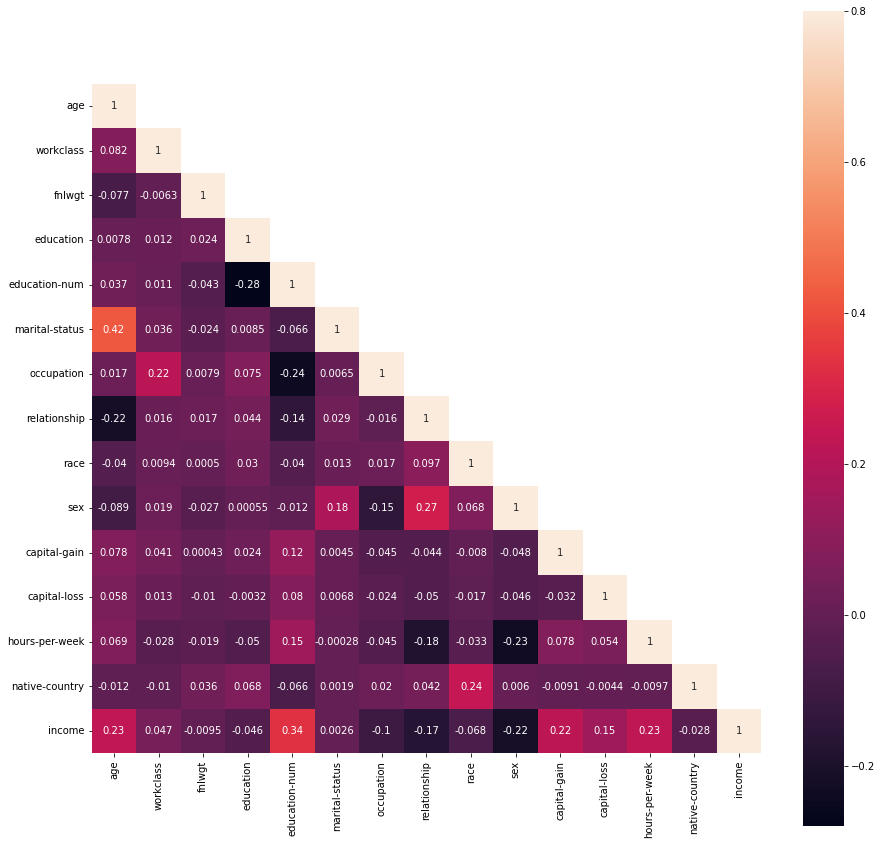

In [21]:
mask = np.array(corr_data)
mask[np.tril_indices_from(mask)] = False

# create appropriate canvas
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)

sns.heatmap(corr_data, mask=mask, vmax=.8, square=True, annot=True, ax = ax)

Later in this notebook, we will do an experiment in which we will remove attributes with correlation coefficient that is closed to 0. From the above correlation coefficient calculation, attributes workclass, fnlwgt, marital-status and native country have the correlation coefficient values that are closed to 0.

## 3. Modeling
We will build our prediction model by using AdaBoostClassifier - an ensemble method.

AdaBoost uses 'boosting' in which the algorithm involves train a bunch of individual models in a sequential manner. Each of the individual model learns from mistakes that are made by the previous model (e.g. misclassified data points).

<p><strong>How AdaBoost works</strong></p>

1. Initialize the weights of data points - each of the data point will have an initialized weight of 1/numberOfDataPoints
2. Train a DT
3. Calculate the <strong>weighted error rate (e)</strong> of the DT which refers to how many wrong predictions out of total.
4. Calculate this DT's weight in the ensemble (the higher, the less decision power the tree will be given during later voting and vice versa)
5. Increase the weight of wrongly classified points (old weight * np.exp(weight of this tree))
6. Repeat step #2 until it reaches the number of trees we set to train
7. Make the final prediction by adding up the weight of each tree multiply the prediction of each tree.

In [22]:
adaboost_1 = AdaBoostClassifier(random_state=0)
adaboost_1 = adaboost_1.fit(X_train,y_train)

# Prediction
y_pred_1 = adaboost_1.predict(X_test)

# Evaluation - accuracy
accuracy_1 = accuracy_score(y_test,y_pred_1)
print(f"The accuracy of the model is {round(accuracy_1,3)*100}%")

The accuracy of the model is 85.9%


### 3.1. Hyperparameter Tuning
GridSearchCV will be used to find the best combination of hyperparameters to our model.

In [23]:
# # Hyperparameter tuning

# from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

# adaboost_2 = AdaBoostClassifier(random_state=0)

# # define the grid of values to search
# grid = dict()
# grid['n_estimators'] = [10, 50, 100, 500]
# grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

# # define the evaluation procedure
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# # define the grid search procedure
# grid_search = GridSearchCV(estimator=adaboost_2, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')

# # execute the grid search
# grid_result = grid_search.fit(X_train, y_train)

# # summarize the best score and configuration
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

The output of the above executed gridsearch for hyperparameter tuning is:
<strong>Best: 0.869609 using {'learning_rate': 1.0, 'n_estimators': 500}</strong>

PS: Commented because it has been executed before - took quite a long time

In [24]:
# Building our model with the best combination of hyperparameter resulted from the gridsearch above

adaboost_tuned = AdaBoostClassifier(random_state=0, learning_rate=1.0, n_estimators=500)
adaboost_tuned = adaboost_tuned.fit(X_train,y_train)

# Prediction
y_pred_tuned = adaboost_tuned.predict(X_test)

# Evaluation - accuracy
accuracy_tuned = accuracy_score(y_test,y_pred_tuned)
print(f"The accuracy of the model is {round(accuracy_tuned,3)*100}%")

The accuracy of the model is 87.0%


### 3.2. Balancing Our Dataset and Hyperparameter tuning
Now, we would like to perform sampling from the train dataset so that the model can be trained using a more balanced dataset.

Class=0, n=24720 (75.91904425539757%)
Class=1, n=7841 (24.080955744602438%)


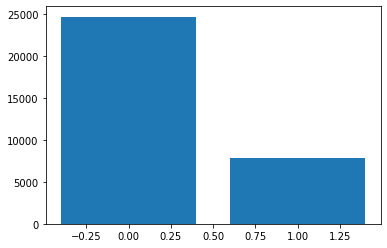

In [25]:
# # Check how 'balanced' the dataset - target class - is
counter = Counter(y_train)
plt.bar(counter.keys(), counter.values())
for k, v in counter.items():
    dist = v/len(y_train) * 100
    print(f"Class={k}, n={v} ({dist}%)")

It can be seen that the dataset is not balanced. There is 75.9% observations have an income of <=50K (class 0) and 24.1% observations have an income of >50K (class 1). Therefore, we can perform sampling strategy(s) to balance the data for training.

#### 3.2.1 Oversampling
Concept: adding more samples in the minority class

SMOTE OVERSAMPLING

In [26]:
# Perform oversampling using SMOTE
oversample = SMOTE()
X_train_os, y_train_os = oversample.fit_resample(X_train, y_train)

Class=0, n=24720 (50.0%)
Class=1, n=24720 (50.0%)


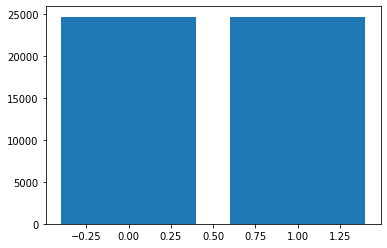

In [27]:
# Check how 'balanced' the dataset - target class - is after oversampling
counter = Counter(y_train_os)
plt.bar(counter.keys(), counter.values())
for k, v in counter.items():
    dist = v/len(y_train_os) * 100
    print(f"Class={k}, n={v} ({dist}%)")

It can be seen that the dataset is now balanced between the 2 classes.

In [28]:
# Hyperparameter tuning

# from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

# adaboost_3 = AdaBoostClassifier(random_state=0)

# # define the grid of values to search
# grid = dict()
# grid['n_estimators'] = [10, 50, 100, 500]
# grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

# # define the evaluation procedure
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# # define the grid search procedure
# grid_search = GridSearchCV(estimator=adaboost_3, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')

# # execute the grid search
# grid_result = grid_search.fit(X_train_os, y_train_os)

In [29]:
# summarize the best score and configuration
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

The resulted best combination of parameters:
<p><strong>Best: 0.870409 using {'learning_rate': 1.0, 'n_estimators': 500}</strong></p>

In [30]:
# Best: 0.870409 using {'learning_rate': 1.0, 'n_estimators': 500}

adaboost_tuned_os = AdaBoostClassifier(random_state=0, learning_rate=1.0, n_estimators=500)
adaboost_tuned_os = adaboost_tuned_os.fit(X_train_os,y_train_os)

# Prediction
y_pred_tuned_os = adaboost_tuned_os.predict(X_test)

# Evaluation - accuracy
accuracy_tuned_os = accuracy_score(y_test,y_pred_tuned_os)
print(f"The accuracy of the model is {round(accuracy_tuned_os,3)*100}%")

The accuracy of the model is 83.39999999999999%


ADASYN OVERSAMPLING

Class=0, n=24720 (50.0%)
Class=1, n=24720 (50.0%)


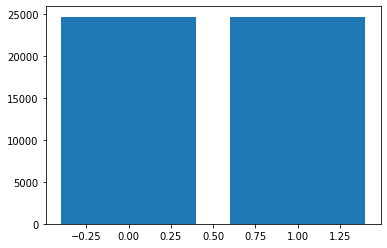

In [31]:
# Perform oversampling using ADASYN
oversample_ada = ADASYN()
X_train_ada, y_train_ada = oversample_ada.fit_resample(X_train, y_train)

# Check how 'balanced' the dataset - target class - is after oversampling
counter = Counter(y_train_os)
plt.bar(counter.keys(), counter.values())
for k, v in counter.items():
    dist = v/len(y_train_os) * 100
    print(f"Class={k}, n={v} ({dist}%)")

In [32]:
adaboost_tuned_ada = AdaBoostClassifier(random_state=0, learning_rate=1.0, n_estimators=500)
adaboost_tuned_ada = adaboost_tuned_ada.fit(X_train_ada,y_train_ada)

# Prediction
y_pred_tuned_ada = adaboost_tuned_ada.predict(X_test)

# Evaluation - accuracy
accuracy_tuned_ada = accuracy_score(y_test,y_pred_tuned_ada)
print(f"The accuracy of the model is {round(accuracy_tuned_ada,3)*100}%")

The accuracy of the model is 82.89999999999999%


#### 3.2.2 Undersampling
Concept: undersample the majority class

RandomUnderSampler UNDERSAMPLING

In [33]:
undersample = RandomUnderSampler()
X_train_us, y_train_us = undersample.fit_resample(X_train, y_train)

Class=0, n=7841 (50.0%)
Class=1, n=7841 (50.0%)


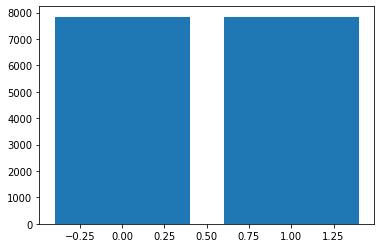

In [34]:
# Check how 'balanced' the dataset - target class - is after undersampling
counter = Counter(y_train_us)
plt.bar(counter.keys(), counter.values())
for k, v in counter.items():
    dist = v/len(y_train_us) * 100
    print(f"Class={k}, n={v} ({dist}%)")

In [202]:
# Hyperparameter tuning
# adaboost_us = AdaBoostClassifier(random_state=0)

# # define the grid of values to search
# grid = dict()
# grid['n_estimators'] = [10, 50, 100, 500]
# grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

# # define the evaluation procedure
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# # define the grid search procedure
# grid_search = GridSearchCV(estimator=adaboost_us, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')

# # execute the grid search
# grid_result = grid_search.fit(X_train_us, y_train_us)

In [203]:
# summarize the best score and configuration
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.839519 using {'learning_rate': 1.0, 'n_estimators': 500}


In [35]:
# The resulted best combination of parameters: Best: 0.839519 using {'learning_rate': 1.0, 'n_estimators': 500}
adaboost_tuned_us = AdaBoostClassifier(random_state=0, learning_rate=1.0, n_estimators=500)
adaboost_tuned_us = adaboost_tuned_us.fit(X_train_us,y_train_us)

# Prediction
y_pred_tuned_us = adaboost_tuned_us.predict(X_test)

# Evaluation - accuracy
accuracy_tuned_us = accuracy_score(y_test,y_pred_tuned_us)
print(f"The accuracy of the model is {round(accuracy_tuned_us,3)*100}%")

The accuracy of the model is 83.39999999999999%


### 3.3. Using Only Features That Has Strong Correlation with income
Build the model by using only features with strong positive and negative correlation with income (target var)

Positive correlation:
1. age
2. education-num
3. capital-gain
4. capital-loss
5. hours-per-week

Negative correlation:
1. occupation
2. relationship
3. sex

In [36]:
features_selected = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'occupation', 'relationship', 'sex']
X_train_fs = df_train[features_selected].values
X_test_fs = df_test[features_selected].values
df_train[features_selected].head()

,age,education-num,capital-gain,capital-loss,hours-per-week,occupation,relationship,sex
0,39,13,2174,0,40,0,0,0
1,50,13,0,0,13,1,1,0
2,38,9,0,0,40,2,0,0
3,53,7,0,0,40,2,1,0
4,28,13,0,0,40,3,2,1


In [37]:
adaboost_fs = AdaBoostClassifier(random_state=0, learning_rate=1.0, n_estimators=500)
adaboost_fs = adaboost_fs.fit(X_train_fs,y_train)

# Prediction
y_pred_fs = adaboost_fs.predict(X_test_fs)

# Evaluation - accuracy
accuracy_fs = accuracy_score(y_test,y_pred_fs)
print(f"The accuracy of the model is {round(accuracy_fs,3)*100}%")

The accuracy of the model is 87.0%


#### 3.3.1 Hyperparameter Tuning

In [194]:
# adaboost_fs_tuned = AdaBoostClassifier(random_state=0)

# # define the grid of values to search
# grid = dict()
# grid['n_estimators'] = [10, 50, 100, 500]
# grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

# # define the evaluation procedure
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# # define the grid search procedure
# grid_search = GridSearchCV(estimator=adaboost_fs_tuned, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')

# # execute the grid search
# grid_result = grid_search.fit(X_train_fs, y_train)

In [195]:
# # summarize the best score and configuration
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.868309 using {'learning_rate': 1.0, 'n_estimators': 500}


The resulted best combination of parameters:
<p><strong>Best: 0.868309 using {'learning_rate': 1.0, 'n_estimators': 500}</strong></p>

In [38]:
adaboost_fs_tuned = AdaBoostClassifier(random_state=0, learning_rate=1.0, n_estimators=500)
adaboost_fs_tuned = adaboost_fs_tuned.fit(X_train_fs,y_train)

# Prediction
y_pred_fs_tuned = adaboost_fs_tuned.predict(X_test_fs)

# Evaluation - accuracy
accuracy_fs_tuned = accuracy_score(y_test,y_pred_fs)
print(f"The accuracy of the model is {round(accuracy_fs_tuned,3)*100}%")

The accuracy of the model is 87.0%


## 4. Evaluation
In this section, the above experiementation models will be evaluated more in detail.

List of experiments:
1. adaboost_1
2. adaboost_tuned (hyperparameter tuning was performed)
3. adaboost_tuned_os (SMOTE oversampling and hyperparameter tuning was performed)
4. adaboost_tuned_ada (ADASYN oversampling and hyperparameter tuning was performed)
5. adaboost_tuned_us (RandomUnderSampler undersampling and hyperparameter tuning was performed)
6. adaboost_fs_tuned (dropping several attributes, no sampling, and hyperparameter tuning was performed)

In [39]:
predictions = {'adaboost_1': y_pred_1, 'adaboost_tuned': y_pred_tuned, 'adaboost_tuned_os': y_pred_tuned_os, 'adaboost_tuned_ada': y_pred_tuned_ada, 'adaboost_tuned_us': y_pred_tuned_us, 'adaboost_fs_tuned': y_pred_fs_tuned}

for key, val in predictions.items():
    print(f"Model: {key}")
    accuracy = accuracy_score(y_test,val)
    print(f"The accuracy of the {key} model is {round(accuracy,3)*100}%")

    precision = precision_score(y_test,val)
    print(f"The precision of the {key} model is {round(precision,3)*100}%")

    recall = recall_score(y_test,val)
    print(f"The recall score of the {key} model is {round(recall,3)*100}%")

    f1 = f1_score(y_test,val)
    print(f"The f1 score of the {key} model is {round(f1,3)*100}%")
    
    print("==============================================================================")

Model: adaboost_1
The accuracy of the adaboost_1 model is 85.9%
The precision of the adaboost_1 model is 75.3%
The recall score of the adaboost_1 model is 59.9%
The f1 score of the adaboost_1 model is 66.7%
Model: adaboost_tuned
The accuracy of the adaboost_tuned model is 87.0%
The precision of the adaboost_tuned model is 77.4%
The recall score of the adaboost_tuned model is 63.3%
The f1 score of the adaboost_tuned model is 69.69999999999999%
Model: adaboost_tuned_os
The accuracy of the adaboost_tuned_os model is 83.39999999999999%
The precision of the adaboost_tuned_os model is 62.2%
The recall score of the adaboost_tuned_os model is 75.5%
The f1 score of the adaboost_tuned_os model is 68.2%
Model: adaboost_tuned_ada
The accuracy of the adaboost_tuned_ada model is 82.89999999999999%
The precision of the adaboost_tuned_ada model is 60.9%
The recall score of the adaboost_tuned_ada model is 77.4%
The f1 score of the adaboost_tuned_ada model is 68.10000000000001%
Model: adaboost_tuned_us


From the evaluation metrics for each model above, it can be seen that adaboost model <strong>adaboost_tuned</strong> with hyperparamter tuning (learning_rate = 1.0 and n_estimators = 500) perfoms best to predict the income of an individual.

In [45]:
# ROC
train_probs = roc_auc_score(y_train, adaboost_tuned.predict_proba(X_train)[:,1])
test_probs = roc_auc_score(y_test, adaboost_tuned.predict_proba(X_test)[:,1])
print(f"Train Probs: {train_probs}")
print(f"Test Probs: {test_probs}")

Train Probs: 0.9293187229685139
Test Probs: 0.9233991587246925


### 4.1. Feature Importance

In [ ]:
#fi_gb = gb.feature_importances_
#features = list(X)
#relative_importance_gb = pd.DataFrame(index=features, data=fi_gb,columns=['importance'])
#relative_importance_gb

In [65]:
fi_adaboost_tuned = adaboost_tuned.feature_importances_
relative_importance_adaboost_tuned = pd.DataFrame(index=features, data=fi_adaboost_tuned, columns=['importance'])
relative_importance_adaboost_tuned

,importance
age,0.062
workclass,0.020
fnlwgt,0.058
education,0.006
education-num,0.014
marital-status,0.012
occupation,0.096
relationship,0.050
race,0.010
sex,0.010


#### 4.1.1 Rebuild the model with variables that have more than 0.02 importance
Why 0.02?
Dropped: education, education-num, marital-status, race, sex, native-country

In [66]:
features_selected_fi = ['age', 'workclass', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week', 'occupation', 'relationship']
X_train_fs_fi = df_train[features_selected_fi].values
X_test_fs_fi = df_test[features_selected_fi].values
df_train[features_selected_fi].head()

,age,workclass,fnlwgt,capital-gain,capital-loss,hours-per-week,occupation,relationship
0,39,0,77516,2174,0,40,0,0
1,50,1,83311,0,0,13,1,1
2,38,2,215646,0,0,40,2,0
3,53,2,234721,0,0,40,2,1
4,28,2,338409,0,0,40,3,2


In [73]:
adaboost_fs_fi = AdaBoostClassifier(random_state=0, learning_rate=1.0, n_estimators=500)
adaboost_fs_fi = adaboost_fs_fi.fit(X_train_fs_fi,y_train)

# Prediction
y_pred_fs_fi = adaboost_fs_fi.predict(X_test_fs_fi)

# Evaluation - accuracy
accuracy_fs_fi = accuracy_score(y_test,y_pred_fs_fi)
print(f"The accuracy of the model is {round(accuracy_fs_fi,3)*100}%")

The accuracy of the model is 86.2%


#### 4.1.2 Rebuild the model with variables that have more than 0.01 importance
Dropped: education

In [68]:
features_selected_fi_2 = ['age', 'workclass', 'fnlwgt', 'education-num', 'marital-status', 'race', 'sex','native-country','capital-gain', 'capital-loss', 'hours-per-week', 'occupation', 'relationship']
X_train_fs_fi_2 = df_train[features_selected_fi_2].values
X_test_fs_fi_2 = df_test[features_selected_fi_2].values
df_train[features_selected_fi_2].head()

,age,workclass,fnlwgt,education-num,marital-status,race,sex,native-country,capital-gain,capital-loss,hours-per-week,occupation,relationship
0,39,0,77516,13,0,0,0,0,2174,0,40,0,0
1,50,1,83311,13,1,0,0,0,0,0,13,1,1
2,38,2,215646,9,2,0,0,0,0,0,40,2,0
3,53,2,234721,7,1,1,0,0,0,0,40,2,1
4,28,2,338409,13,1,1,1,1,0,0,40,3,2


In [74]:
adaboost_fs_fi_2 = AdaBoostClassifier(random_state=0, learning_rate=1.0, n_estimators=500)
adaboost_fs_fi_2 = adaboost_fs_fi_2.fit(X_train_fs_fi_2,y_train)

# Prediction
y_pred_fs_fi_2 = adaboost_fs_fi_2.predict(X_test_fs_fi_2)

# Evaluation - accuracy
accuracy_fs_fi_2 = accuracy_score(y_test,y_pred_fs_fi_2)
print(f"The accuracy of the model is {round(accuracy_fs_fi_2,3)*100}%")

The accuracy of the model is 87.0%


#### 4.1.3 Re-evaluate all developed models

In [75]:
predictions = {'adaboost_1': y_pred_1, 'adaboost_tuned': y_pred_tuned, 'adaboost_tuned_os': y_pred_tuned_os, 'adaboost_tuned_ada': y_pred_tuned_ada, 'adaboost_tuned_us': y_pred_tuned_us, 'adaboost_fs_tuned': y_pred_fs_tuned, 'adaboost_fs_fi_2': y_pred_fs_fi_2}

for key, val in predictions.items():
    print(f"Model: {key}")
    accuracy = accuracy_score(y_test,val)
    print(f"The accuracy of the {key} model is {round(accuracy,3)*100}%")

    precision = precision_score(y_test,val)
    print(f"The precision of the {key} model is {round(precision,3)*100}%")

    recall = recall_score(y_test,val)
    print(f"The recall score of the {key} model is {round(recall,3)*100}%")

    f1 = f1_score(y_test,val)
    print(f"The f1 score of the {key} model is {round(f1,3)*100}%")
    
    print("==============================================================================")

Model: adaboost_1
The accuracy of the adaboost_1 model is 85.9%
The precision of the adaboost_1 model is 75.3%
The recall score of the adaboost_1 model is 59.9%
The f1 score of the adaboost_1 model is 66.7%
Model: adaboost_tuned
The accuracy of the adaboost_tuned model is 87.0%
The precision of the adaboost_tuned model is 77.4%
The recall score of the adaboost_tuned model is 63.3%
The f1 score of the adaboost_tuned model is 69.69999999999999%
Model: adaboost_tuned_os
The accuracy of the adaboost_tuned_os model is 83.39999999999999%
The precision of the adaboost_tuned_os model is 62.2%
The recall score of the adaboost_tuned_os model is 75.5%
The f1 score of the adaboost_tuned_os model is 68.2%
Model: adaboost_tuned_ada
The accuracy of the adaboost_tuned_ada model is 82.89999999999999%
The precision of the adaboost_tuned_ada model is 60.9%
The recall score of the adaboost_tuned_ada model is 77.4%
The f1 score of the adaboost_tuned_ada model is 68.10000000000001%
Model: adaboost_tuned_us


From the evaluation metrics above, model <strong>adaboost_fs_fi_2</strong> has a slightly better performance (precision +0.4%, recall -0.2%) than the previous best (i.e., <strong>adaboost_tuned</strong>). Model <strong>adaboost_fs_fi_2</strong> uses selected variables that have a feature importance of more than 0.01 resulted from <strong>adaboost_tuned</strong> model.

There is a lot of way to explore in order to achieve higher accuracy (currently, the model has an accuracy score of 87%). An additional validation set can be used when developing the model, or other splitting techniques to train and test. Other ML algorithm can also be used and explored (e.g., XGBoost, GradientBoosting, etc.).

In [77]:
# Using pickle (not as a file)
import pickle
pickled_model = pickle.dumps(adaboost_fs_fi_2)
adaboost_tuned_pickled = pickle.loads(pickled_model)
adaboost_tuned_pickled.predict(X_test_fs_fi_2)

array([0, 0, 0, ..., 1, 0, 1])

In [78]:
# Using joblib (as a file)
from joblib import dump, load
dump(adaboost_fs_fi_2, 'income_pred.joblib') 

['income_pred.joblib']

In [79]:
model = load('income_pred.joblib')
model.predict(X_test_fs_fi_2)

array([0, 0, 0, ..., 1, 0, 1])

In [80]:
# Save predicted values as a csv file
pred_df = pd.DataFrame(y_pred_tuned,columns=['income'])
pred_df.to_csv(f"Predicted_Output.csv")